In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
PATH = "./ClassicHit.csv"
df = pd.read_csv(PATH)
df = df.reset_index().rename(columns={'index': 'Song_ID'})

In [3]:
df.head()

,Song_ID,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock
1,1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock
2,2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock
3,3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock
4,4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock


In [4]:
df['Genre'].unique()

array(['Alt. Rock', 'Blues', 'Country', 'Disco', 'EDM', 'Folk', 'Funk',
       'Gospel', 'Jazz', 'Metal', 'Pop', 'Punk', 'R&B', 'Rap', 'Reggae',
       'Rock', 'SKA', 'Today', 'World'], dtype=object)

In [5]:
df.shape

(15150, 19)

In [6]:
df.columns

Index(['Song_ID', 'Track', 'Artist', 'Year', 'Duration', 'Time_Signature',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Popularity', 'Genre'],
      dtype='object')

In [7]:
def scale_features(df):
    features = ['Danceability', 'Energy', 'Loudness','Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence']
    scaler = MinMaxScaler()
    X = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)  # Normalize all features
    return X

def weigh_features(X):
    X.loc[:,'Danceability'] = X['Danceability']*5 # Adjust values to increase weight
    X.loc[:,'Energy'] = X['Energy']*5 # Adjust values to increase weight
    X.loc[:,'Loudness'] = X['Loudness']*5 # Adjust values to increase weight
    return X

In [8]:
X = weigh_features(scale_features(df)) #scale then apply weights

X.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence
0,3.117409,2.557319,3.258731,0.029368,0.038553,0.000000,0.139894,0.610718
1,3.896761,2.297033,3.097270,0.043789,0.112449,0.003475,0.134811,0.973711
2,3.001012,4.083995,4.149509,0.043158,0.004507,0.000032,0.078487,0.524772
3,4.357287,1.926626,3.863250,0.035895,0.154618,0.000000,0.112444,0.499494
4,3.147773,4.384324,4.251315,0.032105,0.019377,0.006930,0.087739,0.876643


In [9]:
# Determine optimal number of clusters using the Elbow method
inertia = []
K_range = range(1, 30)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

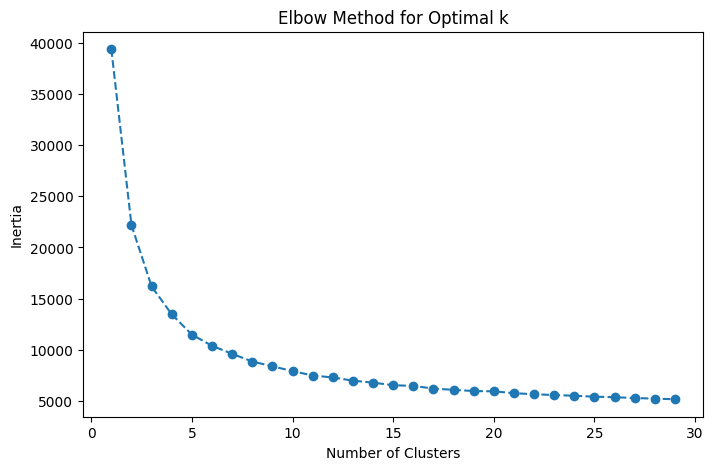

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [11]:
# Apply K-Means clustering with optimal k (adjust after checking the elbow plot)
kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust n_clusters as needed
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/Users/rileydenn/Documents/School/ChicoState/Spring25/CSCI430/djsongmatch/DJvenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


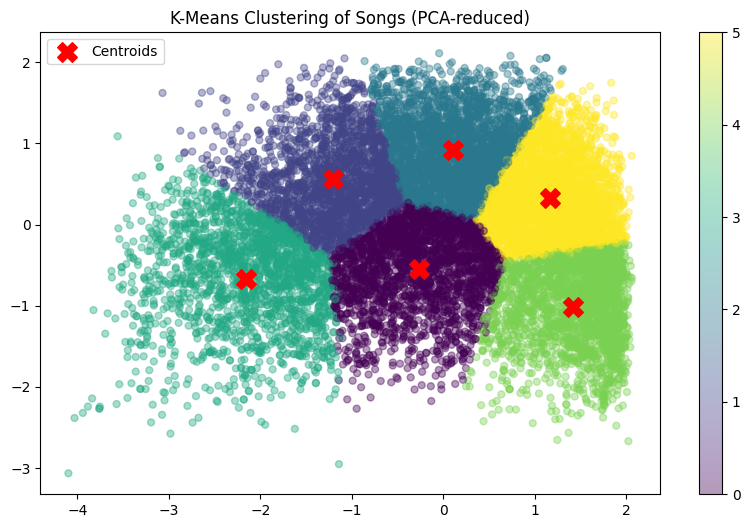

In [12]:
# Use PCA for visualization (reducing 8D data to 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.4, s=25)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.colorbar(scatter)  # Adds a color legend
plt.legend()
plt.title("K-Means Clustering of Songs (PCA-reduced)")
plt.show()

In [13]:
df['Cluster'] = labels

In [16]:
df

,Song_ID,Track,Artist,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre,Cluster
0,0,Hey Jack Kerouac,"10,000 Maniacs",1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,Alt. Rock,1
1,1,Like the Weather,"10,000 Maniacs",1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,Alt. Rock,1
2,2,What's the Matter Here?,"10,000 Maniacs",1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,Alt. Rock,5
3,3,Trouble Me,"10,000 Maniacs",1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,Alt. Rock,1
4,4,Candy Everybody Wants,"10,000 Maniacs",1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,Alt. Rock,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,15145,7 Seconds (feat. Neneh Cherry),Youssou N'Dour,1994,306226,4,0.679,0.659,1,-10.826,0,0.0269,0.07710,0.000004,0.3160,0.528,154.171,47,World,2
15146,15146,Birima,Youssou N'Dour,1995,228373,4,0.692,0.737,10,-7.042,1,0.0512,0.25400,0.017400,0.1120,0.808,105.754,18,World,5
15147,15147,Set,Youssou N'Dour,2004,226826,4,0.733,0.730,0,-11.056,1,0.0479,0.04240,0.000101,0.0282,0.840,146.213,25,World,2
15148,15148,Africa Remembers,Youssou N'Dour,2007,560466,4,0.696,0.378,5,-16.181,0,0.0797,0.44400,0.019400,0.0850,0.551,97.677,8,World,1


In [ ]:
features = ['Danceability', 'Energy', 'Loudness','Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence']
df[features + ['Cluster']].groupby('Cluster').mean()  # Get average feature values per cluster

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence
Cluster,,,,,,,,
0,0.465725,0.563611,-9.275427,0.058011,0.346777,0.085333,0.216643,0.511075
1,0.683419,0.386601,-11.989830,0.070315,0.496867,0.077099,0.156378,0.622941
2,0.753930,0.632422,-8.500004,0.096043,0.196772,0.049674,0.163772,0.710766
3,0.446108,0.219542,-15.451823,0.044031,0.772888,0.184707,0.183309,0.360102
4,0.377015,0.890380,-6.163045,0.091053,0.061425,0.117360,0.267500,0.445475
5,0.639164,0.839679,-6.197744,0.082846,0.129439,0.068588,0.211213,0.668893


In [17]:
''' 
Function to get cluster for an input song, taking into account desired contrast of 
danceability, energy, and loudness. Contrast parameters must be between 0 and 1.
Model must be the same as the original clustering model (that assigned clusters to 
entire dataset) for intended results.
Returns cluster.
'''
def get_recommendation_cluster(df, song_id, model, danceability_contrast=0, energy_contrast=0, loudness_contrast=0):
    scaled_df = scale_features(df)
    scaled_df['Song_ID'] = df['Song_ID']
    song = scaled_df[scaled_df['Song_ID'] == song_id]
    song = song.drop(columns=['Song_ID'])
    
    song.loc[:,'Danceability'] =  (song.loc[:,'Danceability']+(danceability_contrast*0.5))%1
    song.loc[:,'Energy'] = (song.loc[:,'Energy']+(energy_contrast*0.5))%1
    song.loc[:,'Loudness'] = (song.loc[:,'Loudness']+(loudness_contrast*0.5))%1
    
    song = weigh_features(song)

    cluster = int(model.predict(song)[0])
    
    return cluster

In [18]:
get_recommendation_cluster(df, 10, kmeans)

5

In [19]:
get_recommendation_cluster(df, 10, kmeans, 1, 1, 1)

3